In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

sns.set()

insurance=pd.read_csv(r'C:\Users\Anthony\Desktop\archive (1)\insurance.csv')

insurance.head()
print("Summary statistics of the different features in the data set: \n", insurance.describe(include='all'))
print('\n')
print("Null value counts across columns: \n", insurance.isnull().sum())


Summary statistics of the different features in the data set: 
                 age   sex          bmi     children smoker     region  \
count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
unique          NaN     2          NaN          NaN      2          4   
top             NaN  male          NaN          NaN     no  southeast   
freq            NaN   676          NaN          NaN   1064        364   
mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
max       64.000000   NaN    53.130000     5.000000    NaN        NaN   

             charges  
count    1338.000000  
unique       

So we can see there are no null entries in the data. There is 1338 records in this data, with 7 variables, including: age, sex, bmi, children, smoker, and region. The variables BMI and age are continuous variables, while smoker and region are categorical variables. 

Let's first create some new categories that will help us later, I used information online to determine which BMI falls into which BMI category. For age, I determined a young adult would be aged 18-30, a Senior adult would be aged 30-50 and an elder would be 50+.  Once that is done, we can proceed with EDA.

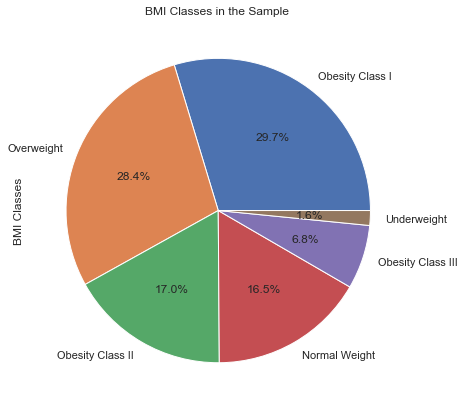

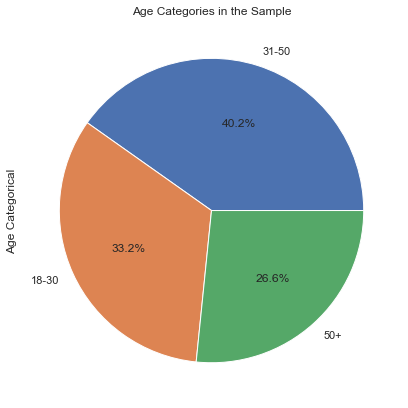

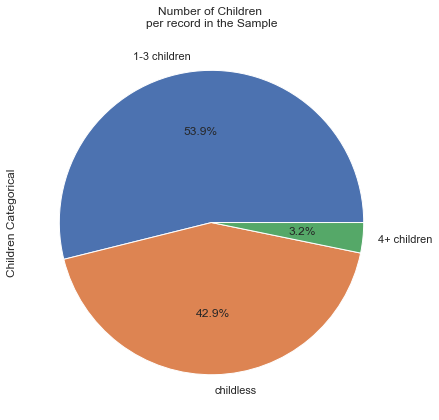

<Figure size 432x288 with 0 Axes>

In [93]:
#creating categorical data 
def children(data):
    if data==0:
        return 'childless'
    if data>=1 and data<=3:
        return '1-3 children'
    if data > 3:
        return '4+ children'
    
def age(age):
    if 18<= age <=30:
        return '18-30'
    if age>30 and age<=50:
        return '31-50'
    if age > 50:
        return '50+'
def get_bmi(b):
    if b <=18.5:
        return 'Underweight'
    if b>18.5 and b<=24.9:
        return 'Normal Weight'
    if 24.9< b <=29.9:
        return 'Overweight'
    if b>29.9 and b<=34.9:
        return 'Obesity Class I'
    if b>34.9 and b<=40:
        return 'Obesity Class II'
    if b>40:
        return 'Obesity Class III'
    
insurance['Children Categorical']=insurance['children'].apply(children)
insurance['Age Categorical']=insurance['age'].apply(age)
insurance['BMI Classes']=insurance['bmi'].apply(get_bmi)

#plotting our pie plots
display(insurance['BMI Classes'].value_counts().plot.pie(title="""BMI Classes in the Sample """,
                                                         autopct="%1.1f%%",figsize=(10,7)))
plt.figure()
display(insurance['Age Categorical'].value_counts().plot.pie(title="""Age Categories in the Sample""", 
                                                             autopct="%1.1f%%",figsize=(10,7)))
plt.figure()
display(insurance['Children Categorical'].value_counts().plot.pie(title="""Number of Children 
per record in the Sample""",autopct="%1.1f%%",figsize=(10,7)))
plt.figure()

#plotting the heatmap
corr = insurance.corr()
hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)


data = [hm]
layout = go.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')


From the data, we can see most patients were charged $14000 or less out of this particular data set. We can also see that on average, women had less insurance charges overall than men. 

In addition, when looking at the pie charts, we can see that many people in the sample were either childless, or had 1-3 children, with only 3.2 percent of the sample having 4 or more children. Also, we can see that age was distributed quite evenly across the categories. Finally, we can see only 16 percent of people in the sample were considered having a normal weight, with everybody else in the sample having some sort of weight condition according to the BMI index. 

Now that we've looked at some statistics of interest, let's compute an ECDF to get a better idea of the distribution of charges: 

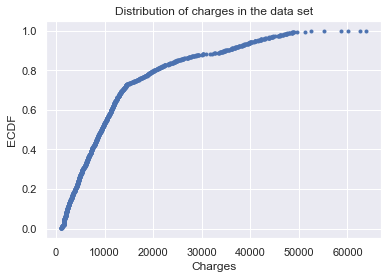

'"for i in insurance.region.value_counts():\n    ecdf(insurance.loc[i][\'charges\'])\n    \n    x_charge, y_charge = ecdf(insurance.loc[i][\'charges\'])\n\n    plt.plot(x_charge, y_charge, marker = \'.\', linestyle=\'none\')\n    plt.xlabel(\'i charges\')\n    plt.ylabel(\'ECDF\')\n    plt.show()'

In [65]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x_charge, y_charge = ecdf(insurance['charges'])

plt.plot(x_charge, y_charge, marker = '.', linestyle='none')
plt.title("Distribution of charges in the data set")
plt.xlabel('Charges')
plt.ylabel('ECDF')
plt.show()

""""for i in insurance.region.value_counts():
    ecdf(insurance.loc[i]['charges'])
    
    x_charge, y_charge = ecdf(insurance.loc[i]['charges'])

    plt.plot(x_charge, y_charge, marker = '.', linestyle='none')
    plt.xlabel('i charges')
    plt.ylabel('ECDF')
    plt.show()"""


From this ECDF we can see that roughly 50% of people in the data set were charged $10,000 or less. The next question we can ask was if there was any difference in charges, on average, between regions? 

   age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

  Children Categorical Age Categorical      BMI Classes  
0            childless           18-30       Overweight  
1         1-3 children           18-30  Obesity Class I  
2         1-3 children           18-30  Obesity Class I  
3            childless           31-50    Normal Weight  
4            childless           31-50       Overweight  


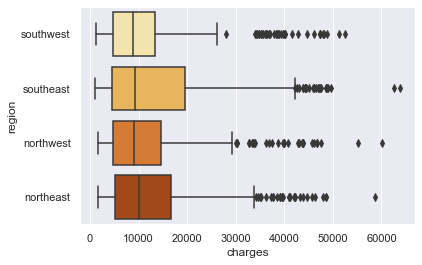

In [66]:
sns.boxplot(y='region', x='charges', data=insurance, orient='h', palette='YlOrBr')

It looks like in the southeast region, mopre people were charged more than $16000 when compared to the other regions. Did smoking affect the amount patients were charged?

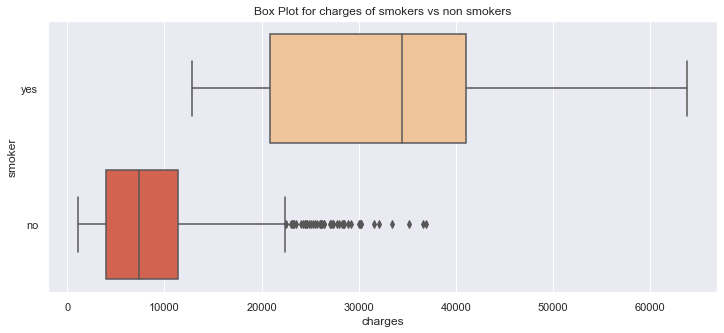

In [40]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for charges of smokers vs non smokers")
sns.boxplot(y='smoker', x='charges', data=insurance,orient='h', palette='OrRd')

It's clear that smokers did end up paying more for health care than non smokers. I am 26 years old, so something I'd be interested in knowing is how many people who were around my age were smoking in this study. 

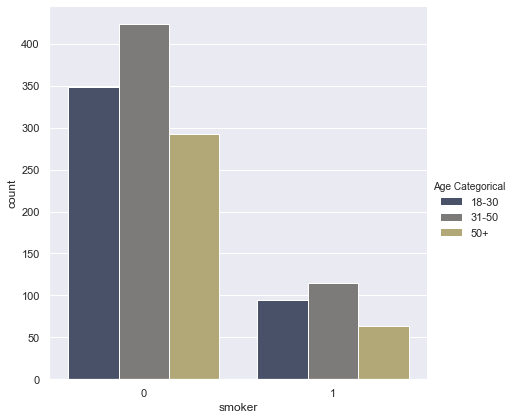

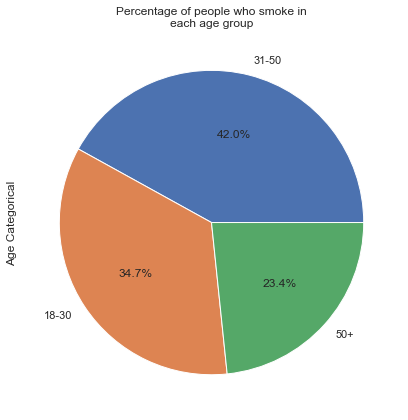

In [104]:
sns.catplot(x='smoker', kind='count', palette='cividis', hue='Age Categorical', data=insurance, height=6)
plt.show()
smokers=insurance[insurance.smoker==1]
plt.figure(figsize=(10,7))
smokers['Age Categorical'].value_counts().plot.pie(title="""Percentage of people who smoke in
each age group""", autopct="%1.1f%%")
plt.show()

In [101]:
insurance[insurance.smoker==1].head()

,age,sex,bmi,children,smoker,region,charges,Children Categorical,Age Categorical,BMI Classes
0,19,0,27.90,0,1,3,16884.9240,childless,18-30,Overweight
11,62,0,26.29,0,1,2,27808.7251,childless,50+,Overweight
14,27,1,42.13,0,1,2,39611.7577,childless,18-30,Obesity Class III
19,30,1,35.30,0,1,3,36837.4670,childless,18-30,Obesity Class II
23,34,0,31.92,1,1,0,37701.8768,1-3 children,31-50,Obesity Class I


 Most people who smoked, from this data, appeared to have been aged between 31-50, and close behind were people who were younger (18-30), with the least amount of people who smoked to have been aged 50+. Another question we can ask is: Did having any children have any affect on the final charges?

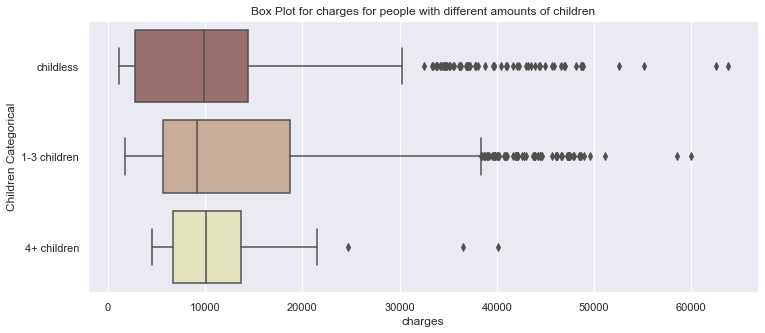

In [42]:
plt.figure(figsize=(12,5))
plt.title("Box Plot for charges for people with different amounts of children")
sns.boxplot(y='Children Categorical', x='charges', data=insurance,orient='h', palette='pink')

It's clear that people who had no children were charged, on average, slightly less than people with no children, although the median amount of charges were roughly the same across the categories presented above. What about diet?

Text(0.5, 1.0, '\nBoxplot for charges for different BMI Classes')

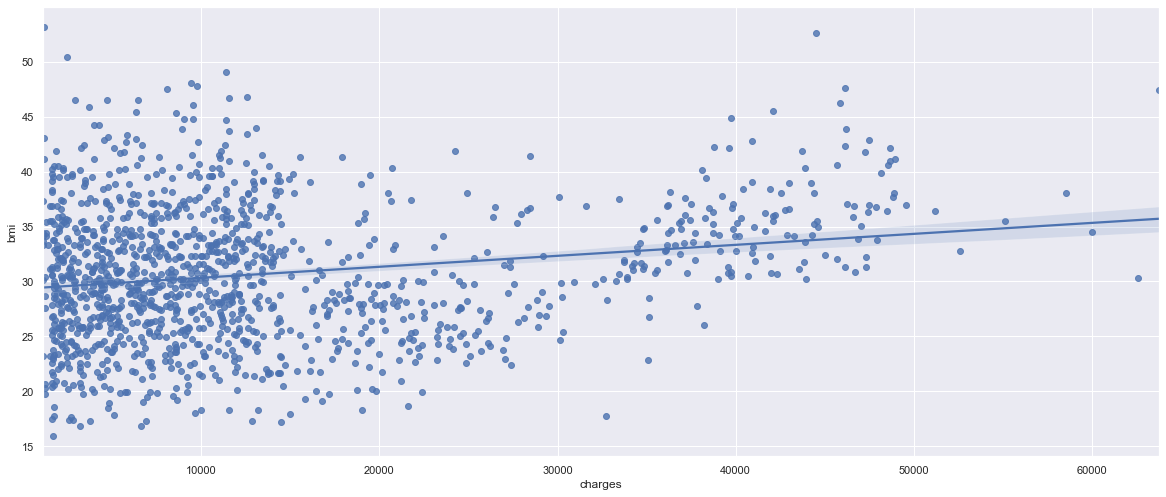

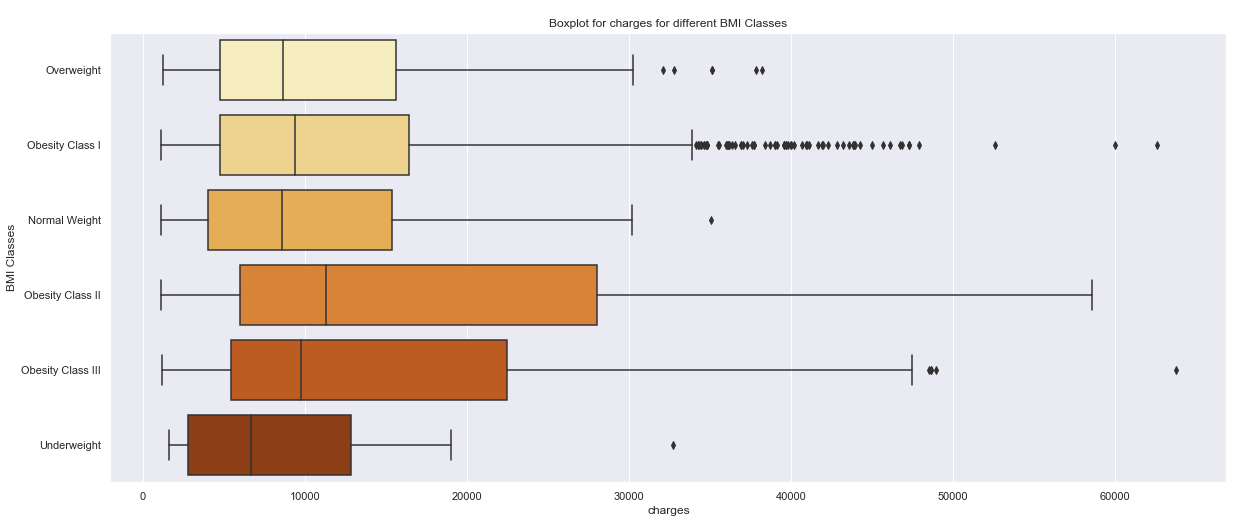

In [108]:
a4_dims = (20, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.regplot(x='charges', y='bmi', data=insurance)
plt.figure(figsize=a4_dims)
sns.boxplot(x='charges', y='BMI Classes', data=insurance, orient='h', palette='YlOrBr').set_title("""
Boxplot for charges for different BMI Classes""")

From the above we can see that there seems to be a slight correlation between patient charges and their BMI. It's also interesting to see that obesity class II tended to be charged more than obesity class III, which is an even worse health condition than obesity class II. In addition, those classified as underweight seemed to also be charged the least out of all those in the sample.  We can also take a look at different regions:

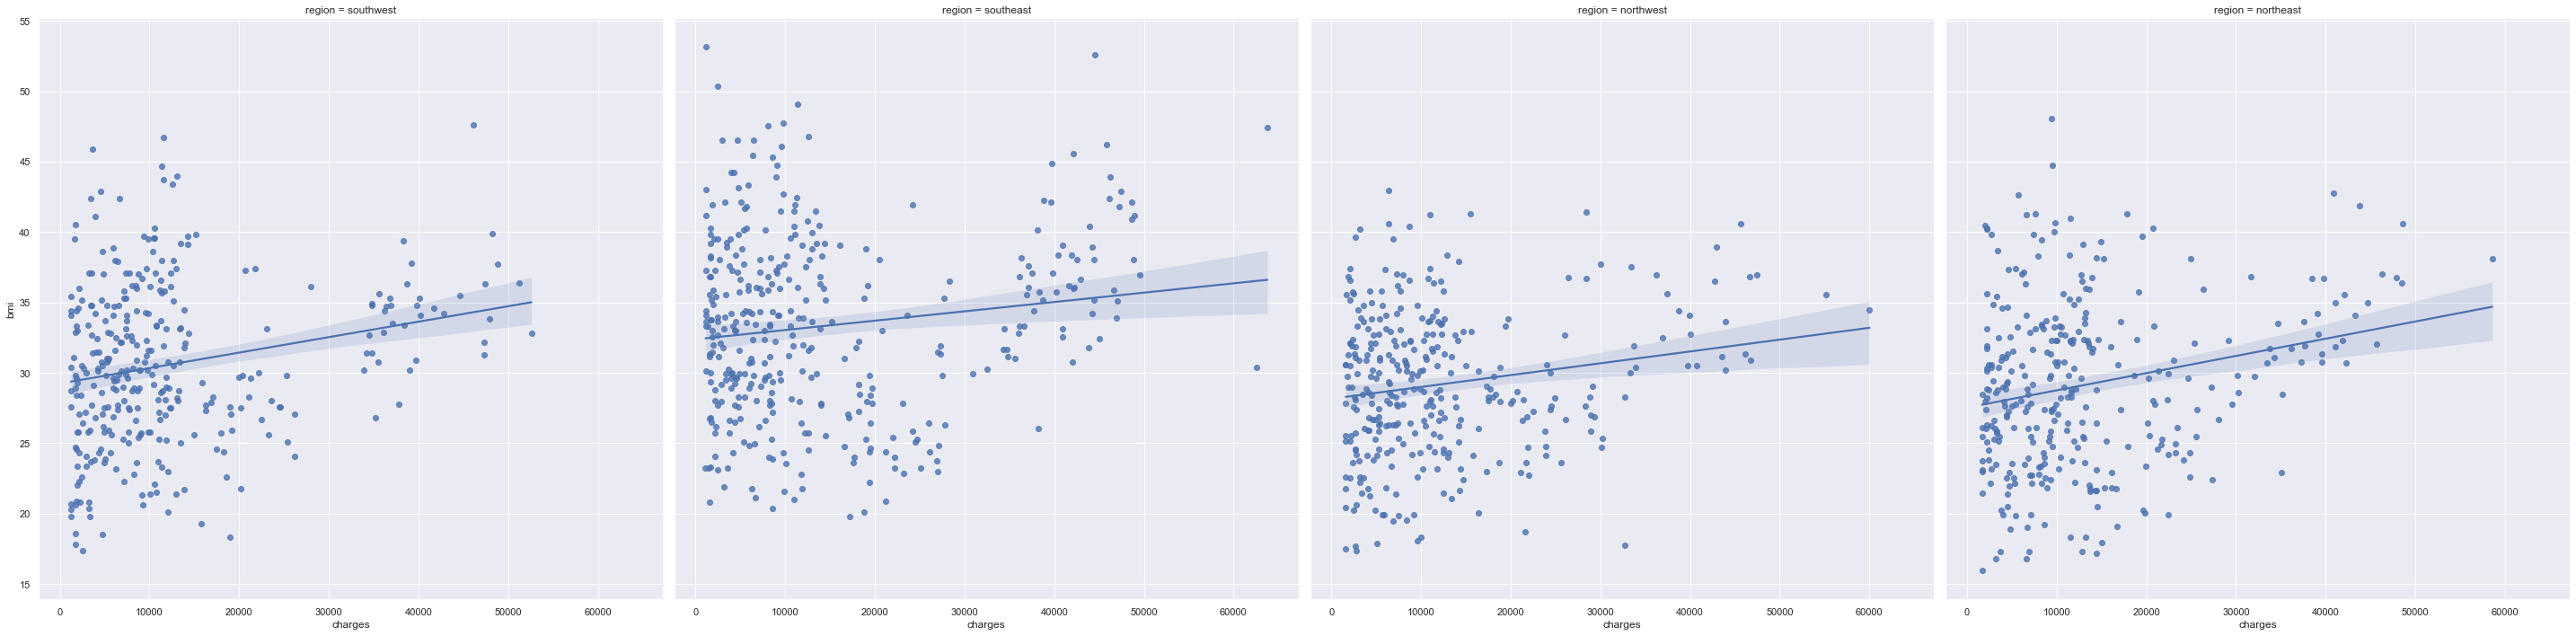

In [44]:
sns.lmplot(x='charges', y='bmi', data=insurance, col='region', height=10)

From the above figure it looks like those in the southeast region have slightly elevated bmi on average, and also more people that were charged over $40000 than the other regions. Now that we've explored our data, we can use multiple linear regression to see if we can estimate charges based on the features that are present in the data set. 

In [48]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
results=smf.ols('charges ~ age+bmi+C(sex)+C(region)+C(smoker)', data=insurance).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     566.0
Date:                Sun, 15 Nov 2020   Prob (F-statistic):               0.00
Time:                        16:16:30   Log-Likelihood:                -13554.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1330   BIC:                         2.717e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept              -1.15

If you were a smoker, OLS predicts you would be paying an additional $23000 in charges! Yikes! An R^2 value of roughly 75 percent tells us that 75 percent of the variability in charges is explained by the the age, the BMI, and whether the patient was a smoker or not. According to the OLS, sex and region did not contribute to the variability in charges. 

Next we can try multiple linear regression to see if we can improve the model:

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#first we have to convert some of our categorical variables into something readable for sklearn

le = LabelEncoder()
le.fit(insurance.sex.drop_duplicates()) 
insurance.sex = le.transform(insurance.sex)
# smoker or not
le.fit(insurance.smoker.drop_duplicates()) 
insurance.smoker = le.transform(insurance.smoker)
#region
le.fit(insurance.region.drop_duplicates()) 
insurance.region = le.transform(insurance.region)

#Now we can move onto train/test split and regression

X=insurance.drop(['charges', 'BMI Classes', 'Children Categorical', 'Age Categorical'], axis=1)
y=insurance.charges

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

reg_all = LinearRegression()

reg_all.fit(X_train, y_train)

y_pred=reg_all.predict(X_test)

print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))



R^2: 0.7694415927057695
Root Mean Squared Error: 5814.246890069995


So we computed an accuracy of roughly 77% with our multiple linear regression model, and an RMSE of 5814. In general, we want our RMSE to be lower, as an RMSE of 0 indicates a perfect fit to the data. Before trying out other models to see if we can improve our model, let's use the benefits of cross validation to use all our data to obtain more metrics, and also check to see if our model performs consistently across different train/test splits, so that in case we ever productionalize the model, it will lead to similar performance. 

In [73]:
from sklearn.model_selection import cross_val_score

cv_scores=cross_val_score(reg_all, X, y, cv=5)

print(cv_scores)
print("\nAverage 5-fold CV score: {}".format(np.mean(cv_scores)))

[0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]

Average 5-fold CV score: 0.7472559473580954


Given that the models performed in a similar way across all 5 folds, it's safe to say that the distribution of the data was roughly the same across the 5 fold cross validation. Linear regression is a good model if the relationship between our features and the charges of patients is linear. Another model I am curious to try is the KNN regressor model, which we can apply to this problem to see the output:

In [75]:
from sklearn import neighbors
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = np.sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    print("R^2: {}".format(model.score(X_test, y_test)))
print("\n\nThe lowest value for RMSE is:",min(rmse_val), "With an associated K Value of K=12")

RMSE value for k=  1 is: 13786.820059553405
R^2: -0.29634990326265553
RMSE value for k=  2 is: 12008.993838002101
R^2: 0.016425481746810355
RMSE value for k=  3 is: 11454.177085452711
R^2: 0.10520857974214604
RMSE value for k=  4 is: 11072.367741129498
R^2: 0.1638676481710677
RMSE value for k=  5 is: 11333.591275328852
R^2: 0.12394954805883107
RMSE value for k=  6 is: 11243.693160926821
R^2: 0.1377921047828039
RMSE value for k=  7 is: 11275.923369304966
R^2: 0.13284195740417548
RMSE value for k=  8 is: 11252.356764504748
R^2: 0.13646287867137397
RMSE value for k=  9 is: 11230.768708367203
R^2: 0.1397731549947674
RMSE value for k=  10 is: 11200.283791009526
R^2: 0.14443683451360245
RMSE value for k=  11 is: 11148.862630350528
R^2: 0.15227468258415588
RMSE value for k=  12 is: 11069.299933682014
R^2: 0.16433091632877017
RMSE value for k=  13 is: 11100.29620749185
R^2: 0.1596442795622286
RMSE value for k=  14 is: 11150.267847993036
R^2: 0.1520609722382329
RMSE value for k=  15 is: 11135.7

It looks like K-nearest neighbors regression did not do that well, with the lowest RMSE being 11069, and the best R^2 value being ~0.164. Linear regression did a much better job at prediction. 
